In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import distance
from collections import Counter
import math
import nltk
import statistics

%matplotlib inline

In [257]:
#Création d'un premier dataframe pour seruus, où on clean le document pour enlever SSD
colonnes = ['indice','pre','lemma','post']
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_brut/Without_tags/seruus_lemme.csv', sep=',', header=4, names=colonnes, encoding ='UTF-8')
df['new'] = df['pre'] + (' ') + df['lemma']+ (' ') + df['post']
df['new'] = df['new'].str.lower()
df['drop'] = df['new'].str.find('seruus2 seruus2 deus')
df = df[df['drop'] == -1]
df = df.drop("drop", axis=1)
df = df['indice'].value_counts()
df = df.reset_index()
df.columns = ['indice','occurrence']

In [292]:
#Création d'un second dataframe pour la fonction.

colonnes = ['indice','pre','lemma','post']
df_ntm = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_texte.csv', sep=',', header=4, names=colonnes, encoding ='UTF-8')
    
df2 = df_ntm['indice'].str.replace(',' , ' ')
df2 = df2.str.split()
texte = df2.drop_duplicates() #C'est pour alléger l'itération.
    
texte_final = []
for i in texte:
    texte_final.append(i[1:])
taille = []
for i in texte_final:
    taille.append(len(i))
            
dataframe = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_brut/Tags/seruus_complet.csv', sep=',', header=4, names=colonnes, encoding ='UTF-8')
final = dataframe['indice'].value_counts()
final = final.tolist()
indice = dataframe['indice'].drop_duplicates()
indice = indice.tolist()


df_final = pd.DataFrame(list(zip(indice,final,taille,)))
df_final.columns = ['indice','occurrence','nbr_tot_mots']   
final = pd.merge(df_final,df, on = 'indice')
final = final.drop('occurrence_x', axis=1)
final['TF-IDF'] = (final['occurrence_y']/final['nbr_tot_mots'])* (math.log10(244085/len(indice)))
final['Fréquence'] = final['occurrence_y']/final['nbr_tot_mots']
final.columns = ['indice','nbr_tot_mots','Occurrences','TF-IDF','Fréquence']


In [293]:
neuvieme = []
for i in x['indice']:
    if i.startswith('08') == True:
        neuvieme.append(i)        
dixieme = []
for i in x['indice']:
    if i.startswith('09') == True:
        dixieme.append(i)
onzieme = []
for i in x['indice']:
    if i.startswith('10') == True:
        onzieme.append(i)
douzieme = []
for i in x['indice']:
    if i.startswith('11') == True:
        douzieme.append(i)
treizieme = []
for i in x['indice']:
    if i.startswith('12') == True:
        treizieme.append(i)
print(dixieme)

['0900_charles-le-simple_276150', '0900_charles-le-simple_276151', '0900_charles-le-simple_276152', '0900_charles-le-simple_49920', '0900_cluny_1483', '0900_mgh-dd-lk_218618', '0900_mgh-dd-lk_218619', '0900_mgh-dd-zw_218614', '0900_paris-stchristophe_52634', '0900_regensburg-stemmeran_224665', '0900_robert-ier-raoul_279207', '0900_rois-de-provence_279259', '0900_st-florian_196016', '0901_charles-le-simple_276158', '0901_charles-le-simple_276160', '0901_cluny_1487', '0901_dijon-stbenigne_8359', '0901_echternach_228450', '0901_langres-chapitre_50916', '0901_mgh-dd-lk_218623', '0901_mgh-dd-lk_218626', '0901_passau_224486', '0901_ratisbonne-eveques_157431', '0901_ratisbonne-eveques_157433', '0901_regensburg-stemmeran_224672', '0901_regensburg-stemmeran_224673', '0901_regensburg-stemmeran_224675', '0901_regensburg-stemmeran_224679', '0901_yonne-auxerre_88316', '0902_charles-le-simple_276164', '0902_charles-le-simple_49922', '0902_mgh-dd-lk_218627', '0902_mgh-dd-lk_218628', '0902_mgh-dd-lk_2

In [205]:
neuvieme_df = pd.Series(neuvieme)
print(neuvieme_df)
neuvieme_final = pd.merge(x,neuvieme_df, on = 'indice')
final = pd.merge(df_final,df, on = 'indice')

#x.merge(neuvieme_df.rename('indice'), left_index=True, right_index=True)

neuvieme_final

0                   0800_fulda_228737
1                   0800_fulda_228738
2                   0800_fulda_228751
3          0800_stomer-stbertin_75560
4                 0801_conques_141040
                    ...              
1239           0899_mgh-dd-arn_218569
1240    0899_mgh-dd-arnulfiger_217198
1241    0899_mgh-dd-arnulfiger_217199
1242    0899_mgh-dd-arnulfiger_217200
1243    0899_mgh-dd-arnulfiger_217201
Length: 1244, dtype: object


ValueError: Cannot merge a Series without a name

In [200]:
onzieme_df = pd.Series(onzieme)
onzieme_final = x.merge(onzieme_df.rename('indice'), left_index=True, right_index=True)
onzieme_final

,indice_x,occurrence,nbr_tot_mots,TF-IDF,Fréquence,indice_y
0,0800_fulda_228737,17,162,0.195556,0.104938,1000_auxerre-lebeuf_274385
1,0800_fulda_228738,16,280,0.106488,0.057143,1000_boica_135161
2,0800_fulda_228751,12,87,0.257039,0.137931,1000_bourgueil-stpierre_49732
3,0800_stomer-stbertin_75560,12,424,0.052742,0.028302,1000_flavigny_141725
4,0801_conques_141040,10,656,0.028408,0.015244,1000_mgh-dd-o-iii_219934
...,...,...,...,...,...,...
713,0874_charles-le-chauve_275969,2,216,0.017255,0.009259,1097_strasbourg-cathedrale_53817
714,0874_charles-le-chauve_275970,2,235,0.015860,0.008511,1098_mgh-dd-h-iv_218073
715,0874_cluny_1433,2,203,0.018360,0.009852,1099_kremsmiunster_185022
716,0874_gorze_69827,2,466,0.007998,0.004292,1099_mgh-dd-h-iv_218193


In [201]:
douzieme_df = pd.Series(douzieme)
douzieme_final = x.merge(douzieme_df.rename('indice'), left_index=True, right_index=True)
len(douzieme_final)
douzieme_final

,indice_x,occurrence,nbr_tot_mots,TF-IDF,Fréquence,indice_y
0,0800_fulda_228737,17,162,0.195556,0.104938,1100_cluny_5178
1,0800_fulda_228738,16,280,0.106488,0.057143,1100_cluny_5197
2,0800_fulda_228751,12,87,0.257039,0.137931,1100_wub_54257
3,0800_stomer-stbertin_75560,12,424,0.052742,0.028302,1100_yonne-molesme_88866
4,0801_conques_141040,10,656,0.028408,0.015244,1101_mgh-dd-h-iv_218131
...,...,...,...,...,...,...
309,0842_charles-le-chauve_275600,2,226,0.016491,0.008850,1196_pflugk-harttung_236567
310,0842_charles-le-chauve_275671,2,212,0.017581,0.009434,1197_wub_54612
311,0842_macon-stvincent_101,2,203,0.018360,0.009852,1198_plpape_245129
312,0842_macon-stvincent_59,2,228,0.016347,0.008772,1199_boica_135026


In [278]:
treizieme_df = pd.Series(treizieme)
treizieme_final = x.merge(treizieme_df.rename('indice'), left_index=True, right_index=True)



AttributeError: 'NoneType' object has no attribute 'merge'

/tmp/ipykernel_4412/2872940799.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([''])


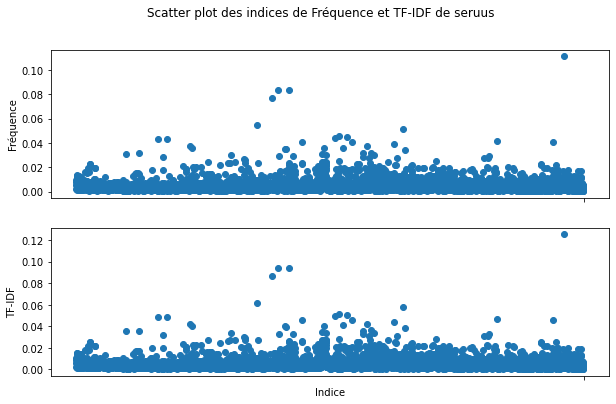

In [294]:
fig, ax = plt.subplots(2, figsize=(10, 6))
plt.suptitle('Scatter plot des indices de Fréquence et TF-IDF de seruus')

ax[0].scatter(x = final['indice'], y = final['Fréquence'])
ax[0].set_xticklabels([''])
ax[0].set_xticks([''])
#ax[0].set_xlabel("Indice")
ax[0].set_ylabel("Fréquence")

ax[1].scatter(x = final['indice'], y = final['TF-IDF'])
ax[1].set_xticks([''])
ax[1].set_xticklabels([''])
ax[1].set_xlabel("Indice")
ax[1].set_ylabel("TF-IDF")

plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/TF-IDF_seruus_')

In [295]:
def csv_scatter_TF_IDF(path,path2, var):
    
    
    #le deuxième path sert à alléger la commande et ne pas itérer dans le
    # gros dataframe
    
    colonnes = ['indice','pre','lemma','post']
    df = pd.read_csv(path, sep=',', header=4, names=colonnes, encoding ='UTF-8')
    
    df2 = df['indice'].str.replace(',',' ')
    df2 = df2.str.split()
    texte = df2.drop_duplicates()
    
    texte_final = []
    for i in texte:
        texte_final.append(i[1:])
    taille = []
    for i in texte_final:
        taille.append(len(i))
            
    dataframe = pd.read_csv(path2, sep=',', header=4, names=colonnes, encoding ='UTF-8')
    final = dataframe['indice'].value_counts()
    final2 = final.tolist()
    indice = dataframe['indice'].drop_duplicates()
    indice = indice.tolist()
    
    final = final.reset_index()
    final.columns = ['indice','occurrence']
    
    df_final = pd.DataFrame(list(zip(indice,final2,taille,)))
    df_final.columns = ['indice','occurrence','nbr_tot_mots']
    
    exportation = pd.merge(df_final,final,on='indice')
    exportattion = exportation.drop('occurrence_x', axis=1)
    
    exportation['TF-IDF'] = (exportation['occurrence_y']/exportation['nbr_tot_mots'])* (math.log10(244085/len(indice)))
    exportation['Fréquence'] = exportation['occurrence_y']/exportation['nbr_tot_mots']
    
    exportation.columns = ['indice','occ','nbr_tot_mots','Occurrences','TF-IDF','Fréquence']
    exportation = exportation.drop('occ',axis=1)
    
    
    return exportation
    
    fig, ax = plt.subplots(2, figsize=(15, 10))
    plt.suptitle(f'Scatter plot des indices de Fréquence et TF-IDF de {var}')

    ax[0].scatter(x = exportation['indice'], y = exportation['Fréquence'])
    ax[0].set_xticklabels([''])
    ax[0].set_xticks([''])
    #ax[0].set_xlabel("Indice")
    ax[0].set_ylabel("Fréquence")

    ax[1].scatter(x = exportation['indice'], y = exportation['TF-IDF'])
    ax[1].set_xticks([''])
    ax[1].set_xticklabels([''])
    ax[1].set_xlabel("Indice")
    ax[1].set_ylabel("TF-IDF")
    
    
    


In [296]:
path1 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Word/mancipium_texte.csv')
path2 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Lemma/mancipium_complet.csv')
path3 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Lemma/ancilla_texte.csv')
path4 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Lemma/ancilla_complet.csv')
path5 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Colonus/Colonus_texte.csv')
path6 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Colonus/Colonus_complet.csv')
path7 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Famulus/Lemma/Famulus_texte.csv')
path8 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Famulus/Lemma/famulus_complet.csv')
path9 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Sclauus/Sclauus_texte.csv')
path10 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Sclauus/Sclauus_complet.csv')
path11 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Lemma/Serua_texte.csv')
path12 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Lemma/serua_complet.csv')
path13 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_texte.csv')
path14 = ('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_brut/Without_tags/seruus_lemme.csv')




/tmp/ipykernel_4412/766147342.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([''])


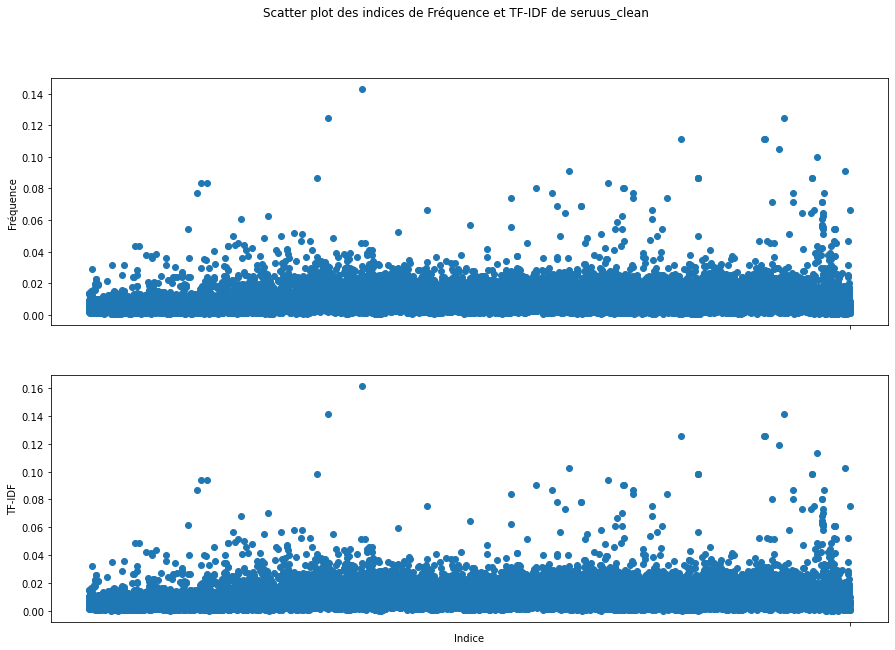

In [277]:
x = csv_scatter_TF_IDF(path13,path14, 'seruus_clean')
#plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/graphiques TF-IDF/seruus_clean.png',dpi = 500)

In [281]:
x = csv_scatter_TF_IDF(path1,path2,"mancipium")

In [282]:
#comparaison_seruus_ancilla = pd.merge(final,x,on = 'indice')
#print(comparaison_seruus_ancilla)
comparaison_seruus_mancipium = pd.merge(final,x,on = 'indice')
#comparaison_seruus_seruus = pd.merge(final,x,on = 'indice')

In [287]:
len(comparaison_seruus_mancipium['TF-IDF_x'])

473

In [291]:
#comparaison_seruus_ancilla = comparaison_seruus_ancilla[['indice','TF-IDF_x','Fréquence_x','TF-IDF_y','Fréquence_y']]
comparaison_seruus_mancipium = comparaison_seruus_mancipium[['indice','TF-IDF_x','Fréquence_x','TF-IDF_y','Fréquence_y']]
comparaison_seruus_mancipium.describe()

,TF-IDF_x,Fréquence_x,TF-IDF_y,Fréquence_y
count,473.000000,473.000000,473.000000,473.000000
mean,0.003552,0.003145,0.006289,0.003375
std,0.002564,0.002271,0.004660,0.002501
min,0.000376,0.000333,0.000621,0.000333
25%,0.001999,0.001770,0.003477,0.001866
50%,0.002918,0.002584,0.005148,0.002762
75%,0.004229,0.003745,0.007474,0.004011
max,0.021441,0.018987,0.042233,0.022663


/tmp/ipykernel_4412/3816016197.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


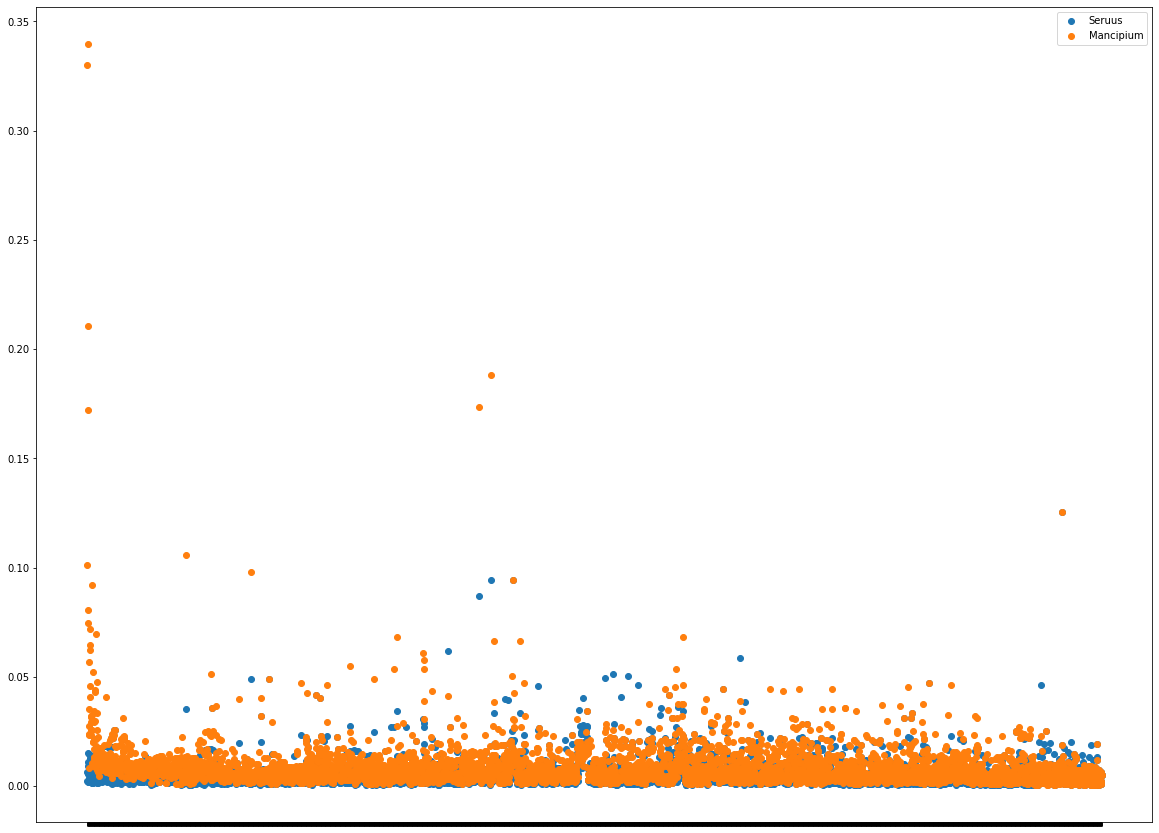

In [286]:
fig, ax = plt.subplots(1,1,figsize = (20,15) )
ax.set_xticklabels([''])
#x.set_xticks([None])

#plt.scatter(comparaison_seruus_ancilla['indice'], comparaison_seruus_ancilla['TF-IDF_x'])
#plt.scatter(comparaison_seruus_ancilla['indice'], comparaison_seruus_ancilla['TF-IDF_y'])

plt.scatter(comparaison_seruus_seruus['indice'], comparaison_seruus_seruus['TF-IDF_x'])
plt.scatter(comparaison_seruus_seruus['indice'], comparaison_seruus_seruus['TF-IDF_y'])
plt.legend(['Seruus','Mancipium'])

plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/TD-IDF_Seruus_Manicpium.png', dpi=300)
plt.show()